## DATA ANALYSIS PYTHON PROJECT - BLINKIT ANALYSIS

##### Designed and Developed by Pritam s

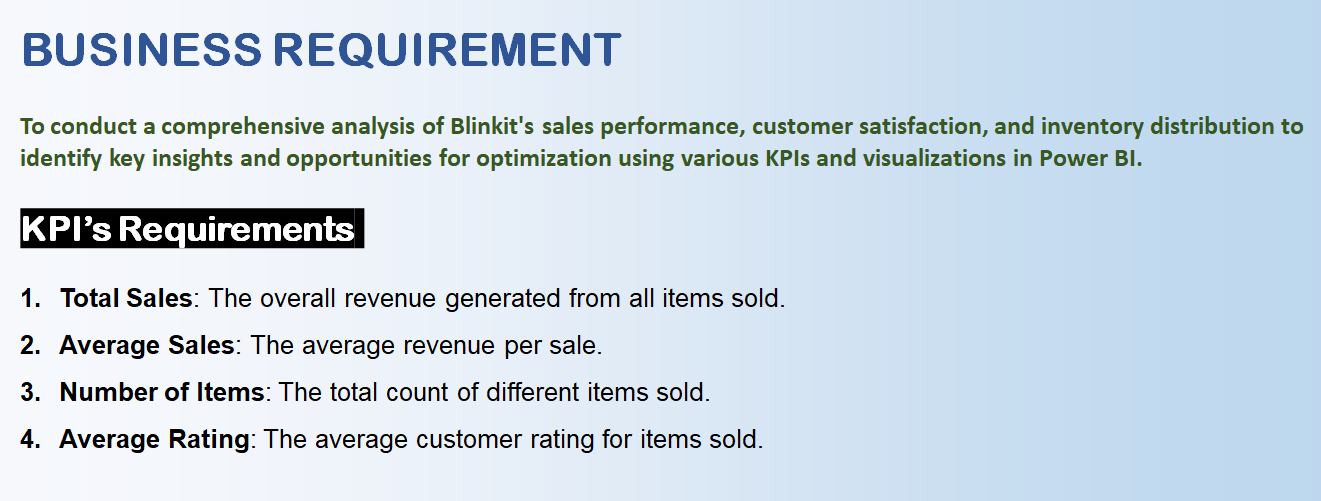

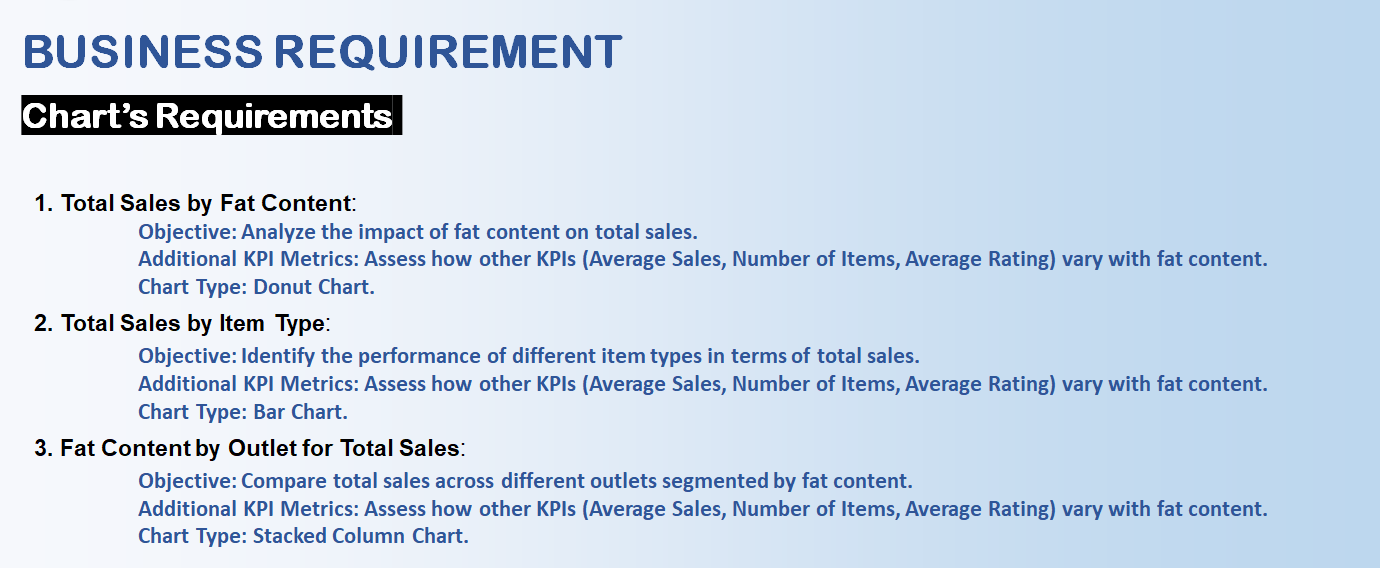

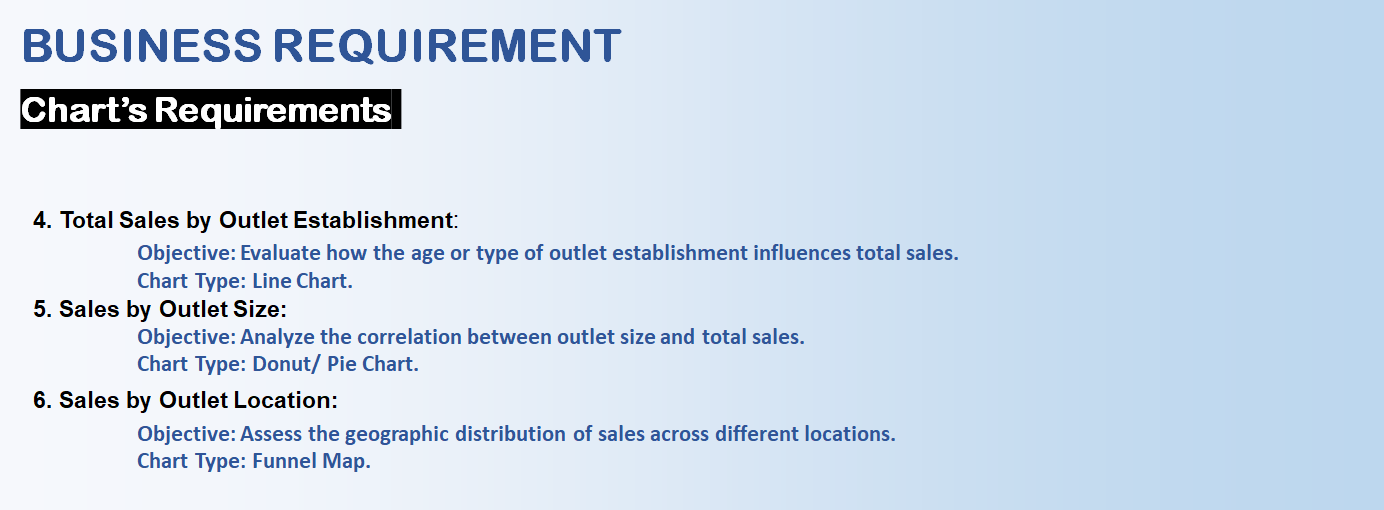

#### Import Prerequisite Libraries

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Import the Dataset

In [7]:
df = pd.read_csv('C:\\Users\\Lenovo\Downloads\\blinkit_data.csv')

#### Head

In [8]:
df.head(2)

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.1,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.8,115.3492,5.0


#### Tail

In [9]:
df.tail(2)

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
8521,reg,FDT50,Dairy,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.107715,NaN,97.8752,4.0
8522,reg,FDM58,Snack Foods,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,NaN,112.2544,4.0


#### Shape

In [10]:
df.shape

(8523, 12)

#### Size

In [11]:
df.size

102276

#### Columns

#### Name of fields or columns

In [12]:
df.columns

Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Sales', 'Rating'],
      dtype='object')

#### Data Types

In [13]:
df.dtypes

Item Fat Content              object
Item Identifier               object
Item Type                     object
Outlet Establishment Year      int64
Outlet Identifier             object
Outlet Location Type          object
Outlet Size                   object
Outlet Type                   object
Item Visibility              float64
Item Weight                  float64
Sales                        float64
Rating                       float64
dtype: object

#### Info

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item Fat Content           8523 non-null   object 
 1   Item Identifier            8523 non-null   object 
 2   Item Type                  8523 non-null   object 
 3   Outlet Establishment Year  8523 non-null   int64  
 4   Outlet Identifier          8523 non-null   object 
 5   Outlet Location Type       8523 non-null   object 
 6   Outlet Size                8523 non-null   object 
 7   Outlet Type                8523 non-null   object 
 8   Item Visibility            8523 non-null   float64
 9   Item Weight                7060 non-null   float64
 10  Sales                      8523 non-null   float64
 11  Rating                     8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


### Check null values

In [15]:
df.isnull().sum()

Item Fat Content                0
Item Identifier                 0
Item Type                       0
Outlet Establishment Year       0
Outlet Identifier               0
Outlet Location Type            0
Outlet Size                     0
Outlet Type                     0
Item Visibility                 0
Item Weight                  1463
Sales                           0
Rating                          0
dtype: int64

In [16]:
df.isnull().sum() / len(df) * 100

Item Fat Content              0.000000
Item Identifier               0.000000
Item Type                     0.000000
Outlet Establishment Year     0.000000
Outlet Identifier             0.000000
Outlet Location Type          0.000000
Outlet Size                   0.000000
Outlet Type                   0.000000
Item Visibility               0.000000
Item Weight                  17.165317
Sales                         0.000000
Rating                        0.000000
dtype: float64

#### Data Cleaning

In [17]:
df['Item Fat Content'].unique()

array(['Regular', 'Low Fat', 'low fat', 'LF', 'reg'], dtype=object)

#### Insights : We noticed we have some augmented data like Low Fat , low fat , lf that all should  as one category like LOW Fat and 'Regular' as should be 'regular'

In [18]:
df['Item Fat Content'].replace({'low fat' : 'Low Fat' , 'LF':'Low Fat' , 'reg':'Regular'},inplace = True)

#### After the replace values

In [19]:
df['Item Fat Content'].unique()

array(['Regular', 'Low Fat'], dtype=object)

#### We replaced those augemented values properly

## Business Requirment

### KPI's Requirments

#### 1.Total Sales 

In [63]:
Total_Sales = df['Sales'].sum()

In [65]:
print(Total_Sales)

1201681.4808


In [58]:
#### In sql

#### select sum(sales) as Total_Sales from blinkit;

#### 2.Average Sales

In [40]:
avg_sales_per_sale = sum(df['Sales']) / df['Sales'].count()

In [41]:
print(avg_sales_per_sale)

140.99278197817708


### OR

In [52]:
df['Sales'].mean()

140.9927819781767

In [ ]:
#### In sql

#### select avg(sales) as avg_sales from blinkit;

#### 3.Number of items

In [ ]:
# in sql
#select count(item_identifier) as count_items_sold from  blinkit group by item_identifier;

In [59]:
No_of_items_sold = df['Item Identifier'].count()

In [60]:
No_of_items_sold

8523

#### 4.Average Rating

In [61]:
Avg_Rating = df['Rating'].sum() / df['Rating'].count()

In [62]:
Avg_Rating

3.965857092573038

#### OR

In [54]:
df['Rating'].mean()

3.965857092573038

In [57]:
### In sql

### select avg(Rating) as avg_rating from blinkit

#### So KPI is just single and concise value . which is visualized by card in powerbi and generated by aggrigator function in sql

In [86]:
print(f"Total Sales : $ {Total_Sales:,.0f}")
print(f"Avg Sales Per Sale : $ {avg_sales_per_sale:,.0f}")
print(f"No_of_items_sold : {No_of_items_sold:,.0f}")
print(f"Avg_Rating :  {Avg_Rating :,.1f}")

Total Sales : $ 1,201,681
Avg Sales Per Sale : $ 141
No_of_items_sold : 8,523
Avg_Rating :  4.0


### Charts Requirment

### 1.Total Sales by Fat Content

In [93]:
#### In sql
## select Item_Fat_Content , sum(Sales) as Total_Sales from blinkit group by Item_Fat_Content order by Total_Sales desc

#### Calulate sum by group by

In [131]:
Total_Sales_per_item = df.groupby('Item Fat Content')['Sales'].sum()

In [132]:
Total_Sales_per_item

Item Fat Content
Low Fat    776319.6784
Regular    425361.8024
Name: Sales, dtype: float64

In [135]:
x_index= Total_Sales_per_item.index

In [136]:
x_index

Index(['Low Fat', 'Regular'], dtype='object', name='Item Fat Content')

In [140]:
y_values = Total_Sales_per_item.values

In [141]:
y_values 

array([776319.6784, 425361.8024])

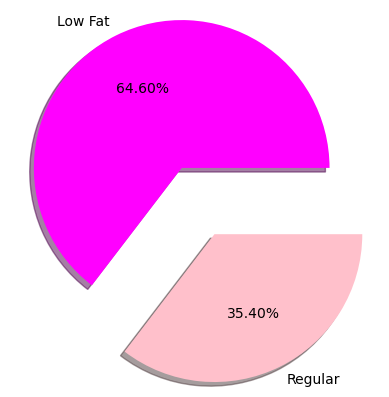

In [164]:
plt.pie(x = y_values , 
        labels = x_index , 
        explode= [0.2 , 0.3],
        colors=['magenta', 'pink'],
        autopct='%1.2f%%',
        pctdistance=0.6,
        shadow=True)
plt.show()

### OR

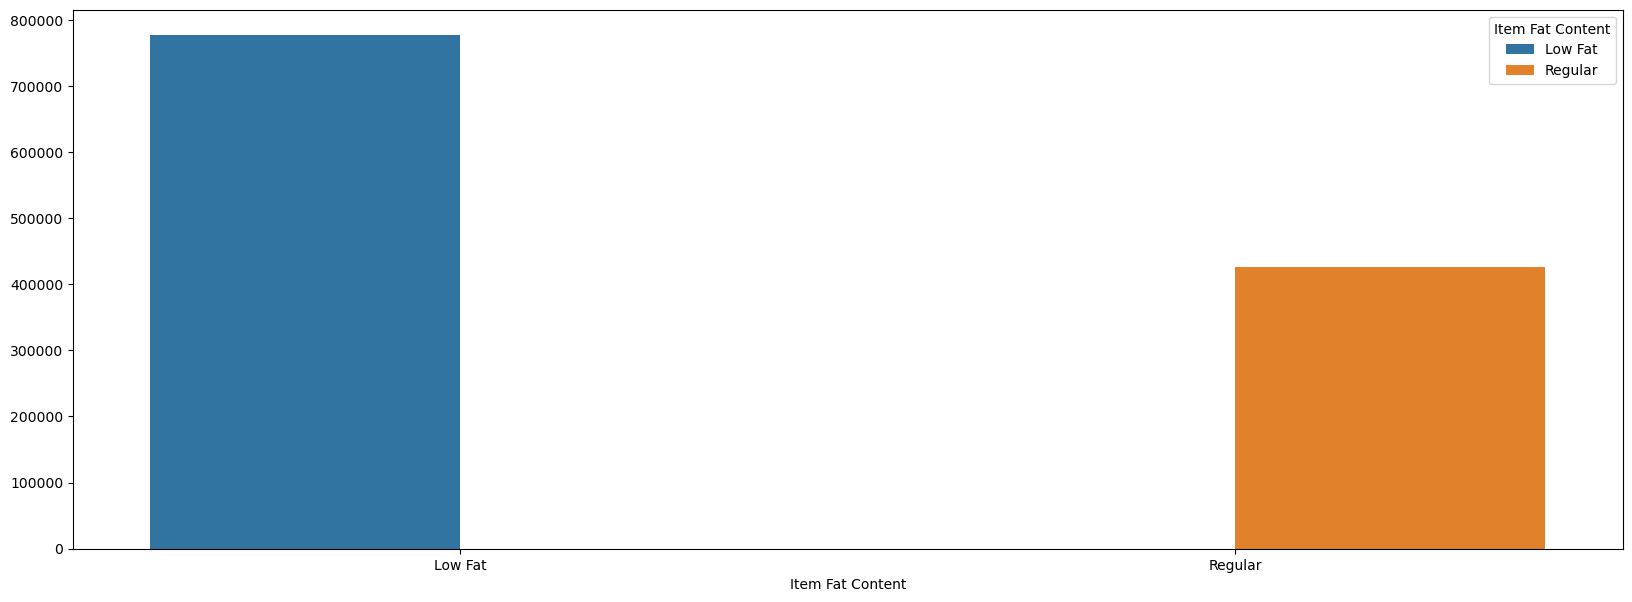

In [158]:
plt.figure(figsize = (20,7))
sns.barplot(x = x_index , y = y_values , hue = x_index)
plt.show()

### 2.Total Sales by Item Type

In [166]:
### In sql

#### select Item Type , sum(Sales) as Total_Sales from blinkit group by Item Type order by Total_Sales desc;

In [172]:
Total_sales_per_Item_type = df.groupby('Item Type')['Sales'].sum()

In [189]:
Total_sales_per_Item_type.sort_values(ascending = False , inplace = True)

In [190]:
Item_type = Total_sales_per_Item_type.index
Sales_per_item_type = Total_sales_per_Item_type.values

In [191]:
print(Item_type)
print(Sales_per_item_type)

Index(['Fruits and Vegetables', 'Snack Foods', 'Household', 'Frozen Foods',
       'Dairy', 'Canned', 'Baking Goods', 'Health and Hygiene', 'Meat',
       'Soft Drinks', 'Breads', 'Hard Drinks', 'Others', 'Starchy Foods',
       'Breakfast', 'Seafood'],
      dtype='object', name='Item Type')
[178124.081  175433.9204 135976.5254 118558.8814 101276.4596  90706.727
  81894.7364  68025.8388  59449.8638  58514.165   35379.1198  29334.6766
  22451.8916  21880.0274  15596.6966   9077.87  ]


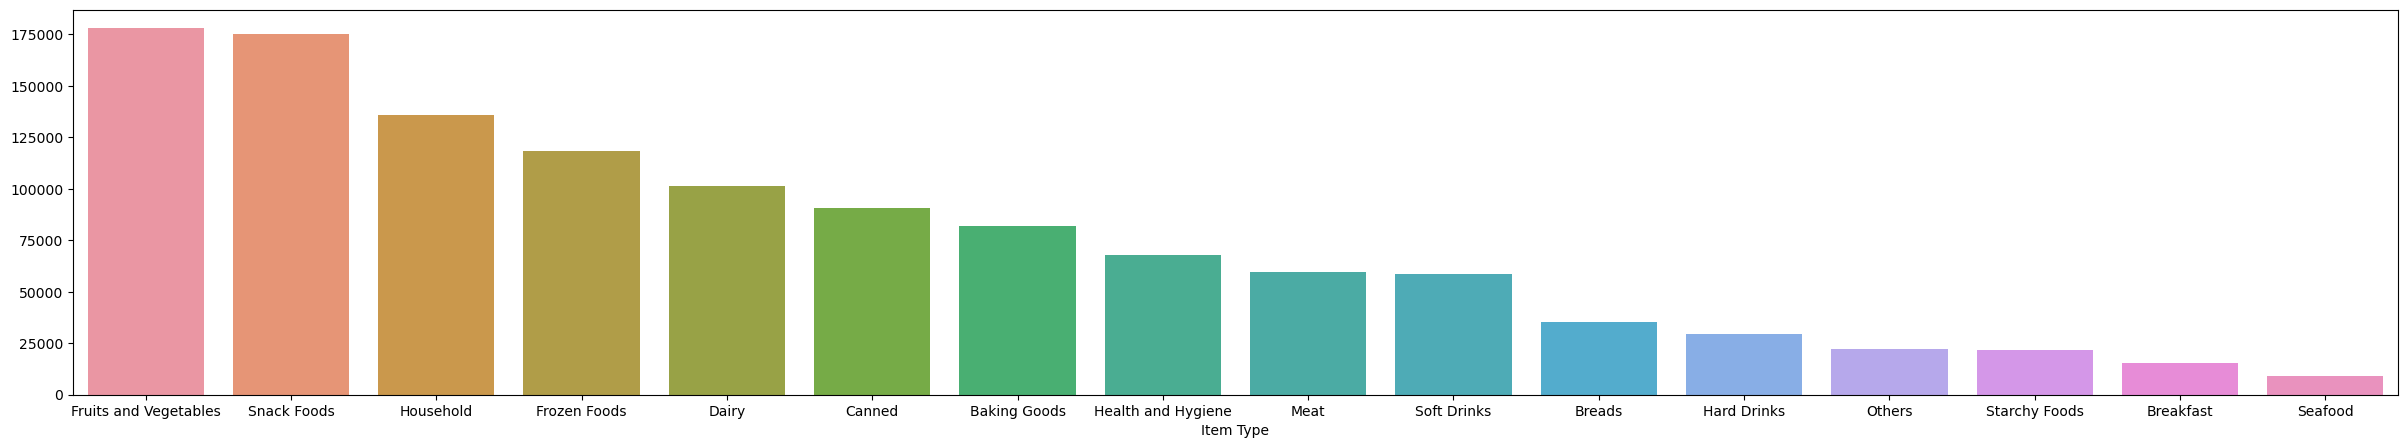

In [196]:
plt.figure(figsize = (30,5))
sns.barplot(x = Item_type , y = Sales_per_item_type)
plt.show()

### 3.Fat Content by Outlet for Total Sales

In [205]:
### In sql 

### select Outlet Identifier , Item Fat Content , sum(Sales) as Total_Sales from blinkit 
### group by Outlet Identifer , Item Fat Content order by Total_Sales desc;

In [208]:
Total_Sales_outlet_per_fat_content = df.groupby(['Outlet Identifier' , 'Item Fat Content'])['Sales'].sum()

In [209]:
Total_Sales_outlet_per_fat_content

Outlet Identifier  Item Fat Content
OUT010             Low Fat             51785.8296
                   Regular             26345.7350
OUT013             Low Fat             86402.1448
                   Regular             45406.8708
OUT017             Low Fat             82947.0458
                   Regular             46156.9106
OUT018             Low Fat             84844.6070
                   Regular             46633.1654
OUT019             Low Fat             48028.5354
                   Regular             25779.0470
OUT027             Low Fat             83774.4110
                   Regular             46940.2636
OUT035             Low Fat             86482.9174
                   Regular             46620.9896
OUT045             Low Fat             85034.8102
                   Regular             45907.9680
OUT046             Low Fat             84603.3212
                   Regular             47510.0486
OUT049             Low Fat             82416.0560
              

In [214]:
Stacked_Data = Total_Sales_outlet_per_fat_content.unstack(fill_value = 0)

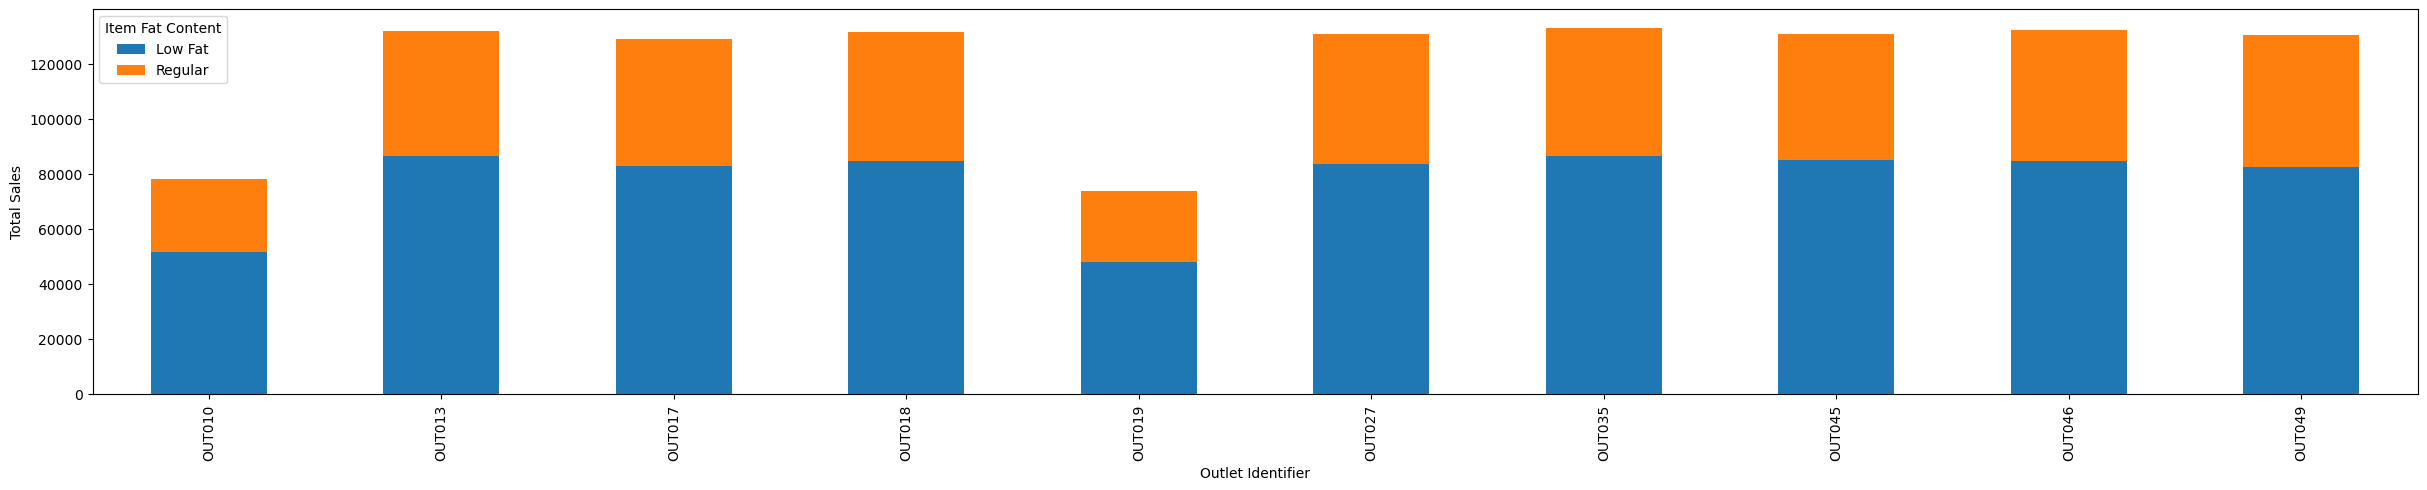

In [258]:
Stacked_Data.plot(kind = 'bar' , stacked = True , figsize = (30,5))
plt.ylabel('Total Sales')
plt.show()

### 4.Total Sales by Outlet Establishment

In [226]:
### In sql

#### select Outlet Establishment Year , sum(Sales) as Total Sales 
#### from blinkit group by Outlet Establishment Year order by Total Sales desc;

In [236]:
Total_sales_per_outlet_establishment = df.groupby('Outlet Establishment Year')['Sales'].sum()

In [254]:
Total_sales_per_outlet_establishment.sort_values(ascending = False)

Outlet Establishment Year
1998    204522.2570
2017    133103.9070
2010    132113.3698
2000    131809.0156
2022    131477.7724
2015    130942.7782
2012    130476.8598
2020    129103.9564
2011     78131.5646
Name: Sales, dtype: float64

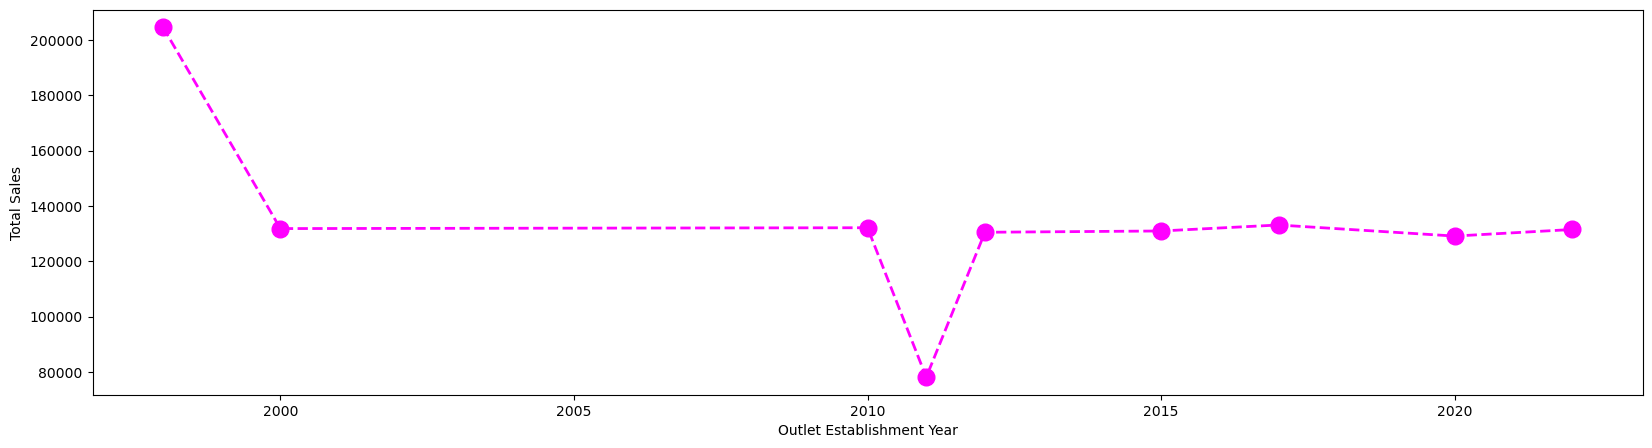

In [257]:
plt.figure(figsize = (20,5))

plt.plot(Total_sales_per_outlet_establishment.index , Total_sales_per_outlet_establishment.values ,
        color='magenta', marker='o', linestyle='dashed', linewidth=2, markersize=12)
plt.xlabel('Outlet Establishment Year')
plt.ylabel('Total Sales')
plt.show()

#### 5.Sales by Outlet Size:

In [260]:
### In sql
### select Outlet_size , sum(Sales) as Total_Sales from blinkit group by Outlet_size order by Total Sales desc;

In [264]:
Sales_by_outlet_size = df.groupby('Outlet Size')['Sales'].sum()

In [265]:
Sales_by_outlet_size

Outlet Size
High      248991.5840
Medium    507895.7284
Small     444794.1684
Name: Sales, dtype: float64

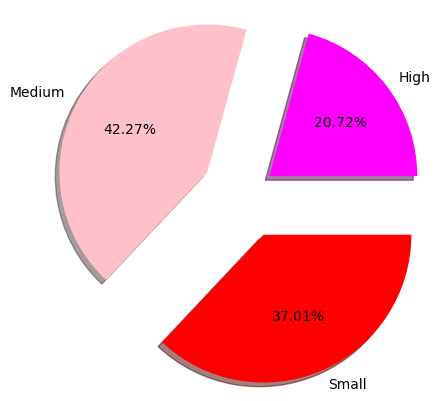

In [267]:
plt.pie( x = Sales_by_outlet_size.values,
    explode=[0.2,0.3,0.3],
    labels=Sales_by_outlet_size.index,
    colors=['magenta','pink' , 'Red'],
    autopct='%1.2f%%',
    shadow=True)

plt.show()

#### Sales by Outlet Location

In [270]:
#### In sql ,
#### select outlet_location_type , sum(Sales) as Total Sales from blinkit group by outlet_location_type 
#### order by Total Sales desc

In [275]:
Sales_by_outlet_location = df.groupby('Outlet Location Type')['Sales'].sum()

In [276]:
Sales_by_outlet_location

Outlet Location Type
Tier 1    336397.8120
Tier 2    393150.6416
Tier 3    472133.0272
Name: Sales, dtype: float64

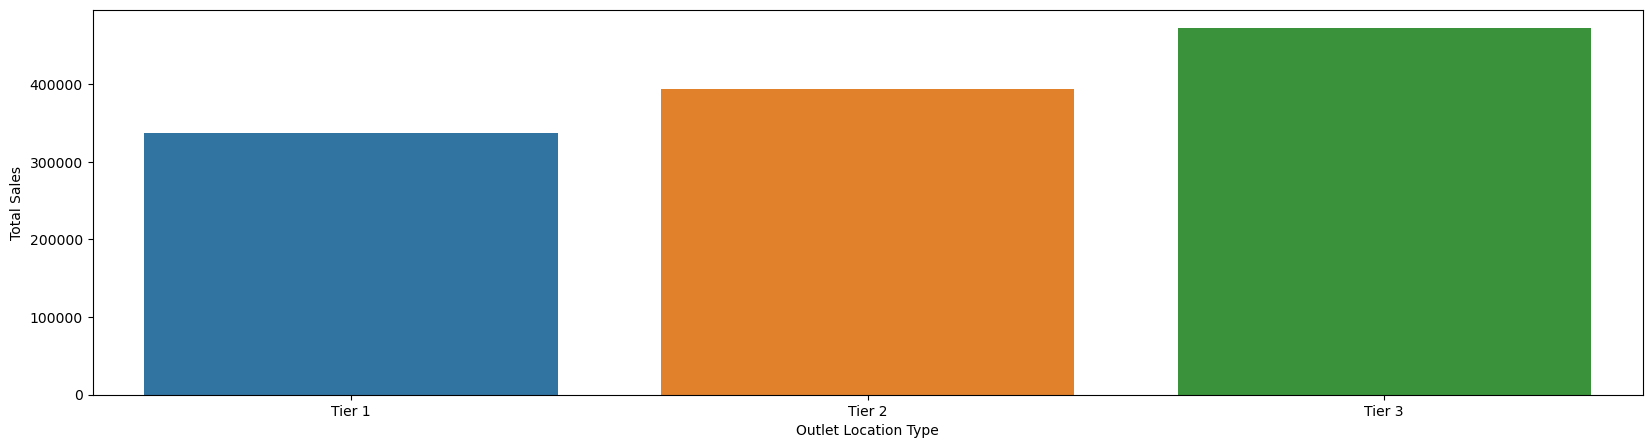

In [298]:
plt.figure(figsize = (20,5))
sns.barplot( x = Sales_by_outlet_location.index , y = Sales_by_outlet_location.values)
plt.xlabel('Outlet Location Type')
plt.ylabel('Total Sales')
plt.show()